In [4]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
import multiprocessing
import pandas as pd
from tqdm import tqdm
import time
from copy import deepcopy
from hydra import initialize, compose

from package.helpers.test_physical_lens import TestPhysicalLens
from package.helpers.lens import Lens
from package.plots import diagnostic_plot, plot
from package.utils import util

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [6]:
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir

figure_dir = os.path.join(repo_dir, 'figures')
array_dir = os.path.join(array_dir, 'test_physical_lens')

In [9]:
csv_path = os.path.join('/data','bwedig', 'roman-population', 'data', 'dictparaggln_Area00000010.csv')
df = pd.read_csv(csv_path)

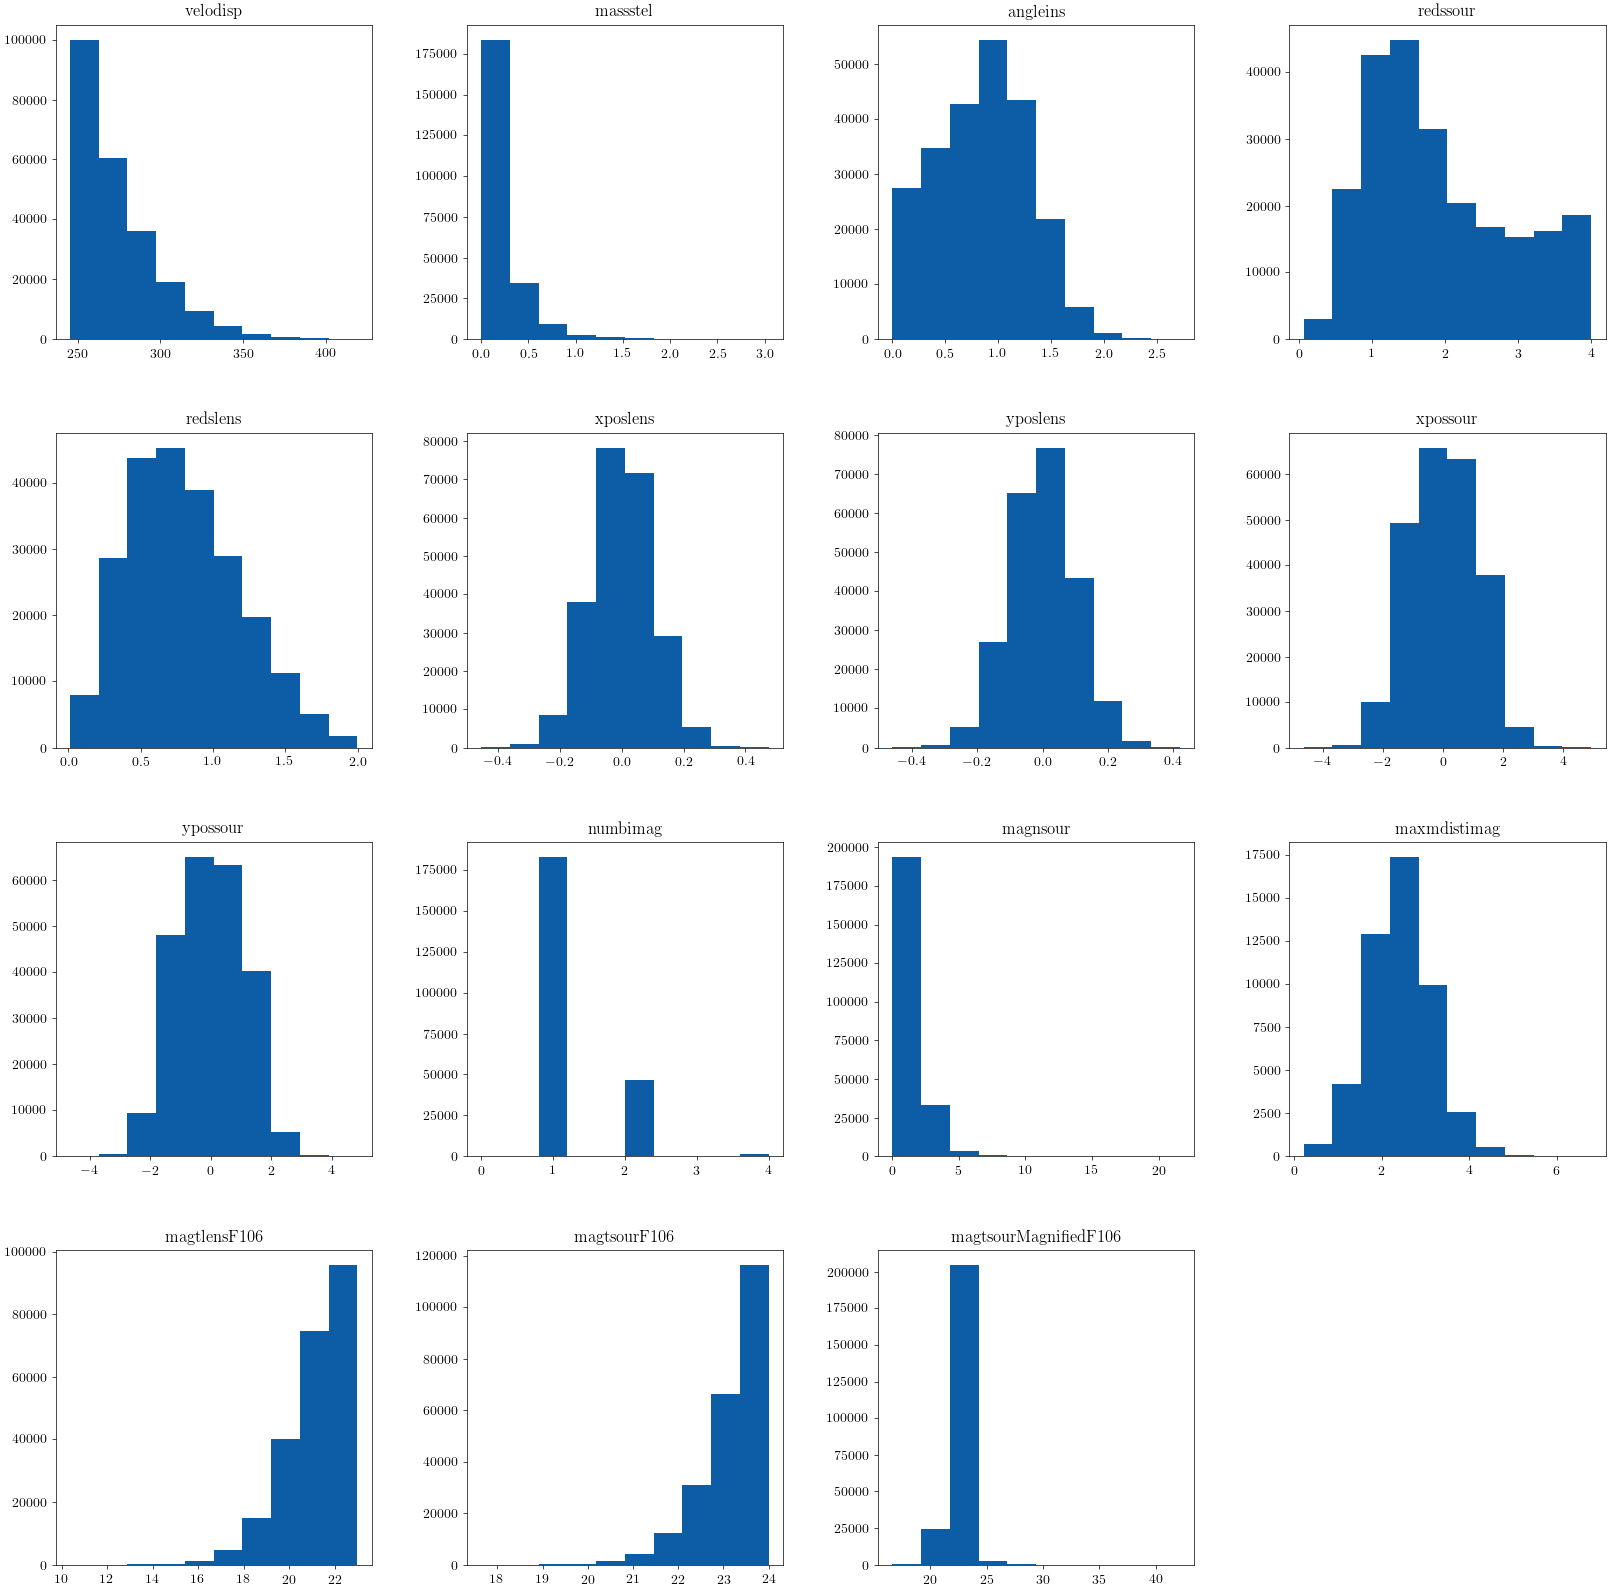

In [14]:
hist = df.hist(grid=False, figsize=(20, 20))
plt.savefig(os.path.join(figure_dir, 'skypy_pop_hist.png'))